# Trabalho 3: Raciocínio Neuro-Simbólico com LTN

## 📌 Descrição Geral

Este repositório contém o código e a documentação do **Trabalho 3 da disciplina Fundamentos de Inteligência Artificial (FIA)**.  
O objetivo é implementar e analisar um sistema de **Raciocínio Neuro-Simbólico (NeSy)** baseado em **Logic Tensor Networks (LTN)**, integrando percepção neural, conhecimento lógico e inferência simbólica.

Além dos cenários gerados aleatoriamente, conforme solicitado no enunciado, foi incluído **um cenário manual**, construído explicitamente com objetos definidos à mão, permitindo uma análise mais controlada e interpretável do comportamento do sistema.

---

## 1. NeSy e Logic Tensor Networks (LTN)

### 🔹 Neuro-Symbolic Learning (NeSy)
NeSy combina:
- **Modelos neurais**, responsáveis por lidar com dados contínuos e perceptuais;
- **Lógica simbólica**, responsável por impor regras, restrições e estrutura semântica.

Essa integração permite sistemas mais **interpretáveis**, **estruturados** e capazes de realizar **raciocínio lógico explicável**.

### 🔹 Logic Tensor Networks (LTN)
As LTNs representam:
- Predicados como funções neurais diferenciáveis;
- Fórmulas lógicas como restrições;
- O grau de verdade das fórmulas por meio de **satisfatibilidade fuzzy**.

O treinamento ocorre maximizando a satisfatibilidade global das fórmulas lógicas.

---

## 2️. Dataset CLEVR e Descrição Simplificada

O trabalho utiliza dados inspirados no **dataset CLEVR**, compostos por cenários sintéticos com múltiplos objetos.

Cada objeto é descrito por:
- **Cor**: vermelho, verde ou azul;
- **Forma**: círculo, quadrado, cilindro, cone ou triângulo;
- **Tamanho**: pequeno ou grande;
- **Posição espacial**: coordenadas contínuas no plano.

### 🔹 Cenários Aleatórios
- Gerados automaticamente;
- Utilizados para avaliar a generalização do sistema em diferentes instâncias do problema.

### 🔹 Cenário Manual (Realizado Previamente)
- Criado explicitamente com objetos definidos à mão;
- Permite validar se o raciocínio lógico está de acordo com a semântica esperada;
- Facilita a interpretação das respostas e a análise qualitativa do sistema.

---

## 3️. Predicados, Axiomas e Fórmulas Lógicas

### 🔹 Predicados
- **Perceptuais**: `isRed`, `isGreen`, `isBlue`, `isCircle`, `isSquare`, `isCylinder`, `isCone`, `isTriangle`, `isSmall`, `isBig`
- **Espaciais (treináveis)**: `leftOf`, `rightOf`, `above`, `below`
- **Derivado**: `canStack(x, y)`

---

## 4️. Valor de Satisfatibilidade das Fórmulas

São reportados:
- **Satisfatibilidade global (SatAgg)** do conjunto de axiomas;
- **Satisfatibilidade individual** de cada fórmula lógica;
- **Satisfatibilidade das perguntas (queries)** de raciocínio.

Esses valores são analisados tanto para os cenários aleatórios quanto para o cenário manual.

---

## 5️. Protocolo Experimental — 5 Execuções

### 5.1. Treinamento:
- O modelo é **treinado uma única vez**, partindo de um cenário introduzido manualmente (realizado previamente em sala de aula);
- O objetivo é capturar as regularidades lógicas do domínio.

### 5.2. Avaliação:
- O passo de **geração de dados** é repetido **5 vezes**, produzindo **5 datasets aleatórios distintos**;
- Para cada dataset:
  - O cenário é plotado;
  - As consultas de raciocínio são executadas;
  - As métricas são calculadas;
- Não há re-treinamento entre execuções, garantindo independência entre os cenários.

---

## 6️. Resultados Reportados

Para **cada uma das 5 execuções**, são apresentados:

### 🔹 Métricas Lógicas
- **Satisfatibilidade (SatAgg)**:
  - de cada axioma;
  - de cada fórmula;
  - de cada pergunta de raciocínio.

### 🔹 Métricas Clássicas
Calculadas para os predicados perceptuais:
- **Acurácia**
- **Precisão**
- **Recall**
- **F1-score**

---

## 7️. Explicação dos Resultados (Célula Final)

Ao final do notebook, é incluída uma **célula dedicada à explicação dos resultados**, na qual:

- Cada pergunta de raciocínio é analisada individualmente;
- Justifica-se, em linguagem natural, o valor de satisfatibilidade obtido;

Essa etapa atende ao requisito de **explicabilidade** solicitado no enunciado.

---

## 📁 Estrutura do Repositório

- `notebook.ipynb` — implementação completa do sistema LTN;
- `README.md` — descrição do projeto, protocolo experimental e resultados;

---

## 8. Conclusão

Os resultados demonstram que **Logic Tensor Networks** permitem integrar aprendizado neural e raciocínio lógico de forma consistente.  
A inclusão de um **cenário manual** fortalece a análise qualitativa, evidenciando maior interpretabilidade das respostas obtidas.

---

## 9. Integrantes

- Giovani Artil Oliveira de Carvalho (giovaniartil@icomp.ufam.edu.br)
- Jorge Samuel Silva Coelho (samcoelho@icomp.ufam.edu.br)
- Renata Modesto Fernandes (renata.modesto@icomp.ufam.edu.br)
- Sofia Pinho Icavino Moura (sofiaicavino@icomp.ufam.edu.br)
- Vitória Luz Edwards (vitoria.edwards@icomp.ufam.edu.br)


In [ ]:
!pip install git+https://github.com/logictensornetworks/LTNtorch

  Cloning https://github.com/logictensornetworks/LTNtorch to /tmp/pip-req-build-nuthydic
  Running command git clone --filter=blob:none --quiet https://github.com/logictensornetworks/LTNtorch /tmp/pip-req-build-nuthydic
  Resolved https://github.com/logictensornetworks/LTNtorch to commit d1bd98169cc2121f8cdd25ff99901e4589923c95
  Preparing metadata (setup.py) ... done


In [ ]:
# Reproducibility seeds
import os, random, numpy as np, torch
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)
print(f"Seeds set to {seed}")

Seeds set to 42


In [ ]:
import torch
import torch.nn as nn
import ltn
import numpy as np
import matplotlib.pyplot as plt

### Código para Gerar o Dataset

Este código cria o cenário de 25 objetos feitos à mão em sala e gera os vetores exatamente no formato [x, y, r, g, b, s], que seram utilizados para treinamento. Nos resultados finais código cria a classe CLEVR_Generator.

In [ ]:
def get_clevr_data(n_samples):
    """

    ESTRUTURA DO VETOR [11 features]:
    -------------------------------------------------
    [0, 1]    : Posição x, y (0.0 a 1.0)
    [2, 3, 4] : Cores One-Hot (Vermelho, Verde, Azul)
    [5, 6, 7, 8, 9] : Formas One-Hot (Círculo, Quadrado, Cilindro, Cone, Triângulo)
    [10]      : Tamanho (0.0 = Pequeno, 1.0 = Grande)
    -------------------------------------------------
    """
    data = []
    labels = []

  # Criação do cenário de 25 objetos feitos à mão em sala:
    data = [[2,18,1,0,0,1,0,0,0,0,0],
            [10.5,3.5,1,0,0,0,0,0,0,1,1],
            [5.5,2.5,0,1,0,1,0,0,0,0,0],
            [2.5,4.5,1,0,0,0,0,0,1,0,1],
            [4.5,8.5,1,0,0,0,0,1,0,0,1],
            [7.1,12,0,0,1,1,0,0,0,0,0],
            [8.2,17.9,0,0,1,1,0,0,0,0,1],
            [10.4,16,0,1,0,0,0,1,0,0,0],
            [11,10,0,1,0,0,0,0,1,0,0],
            [13.7,5.2,0,1,0,0,0,0,0,1,1],
            [12,1,1,0,0,0,0,0,0,1,1,],
            [15.5,1.5,1,0,0,0,0,1,0,0,0],
            [19,2,1,0,0,0,0,0,1,0,1],
            [24,0,0,0,1,0,0,0,0,1,0],
            [23.2,7.1,0,1,0,0,0,0,1,0,1],
            [11,23,0,0,1,1,0,0,0,0,1],
            [7,17,0,1,0,1,0,0,0,0,1],
            [10,15,1,0,0,0,1,0,0,0,0],
            [13.5,14.7,0,0,1,0,0,1,0,0,1],
            [17,17,1,0,0,0,0,0,0,1,0],
            [18.5,29.5,0,1,0,0,1,0,0,0,0],
            [15,20.2,0,1,0,0,0,0,0,1,0],
            [15.5,23.5,1,0,0,1,0,0,0,0,0],
            [17.5,24.5,1,0,0,1,0,0,0,0,1],
            [15,4.5,1,0,0,0,0,0,1,0,1]]

    # Normalizar os valores de x e y
    xs = [d[0] for d in data]
    ys = [d[1] for d in data]

    min_x, max_x = min(xs), max(xs)
    min_y, max_y = min(ys), max(ys)

    # Mapeamento
    shapes_names = ["Circle", "Square", "Cylinder", "Cone", "Triangle"]
    colors_names = ["Red", "Green", "Blue"]
    sizes_names  = ["Small", "Large"]

    for d in data:

        # Aplica normalização
        d[0] = (d[0] - min_x) / (max_x - min_x) if max_x != min_x else 0.0
        d[1] = (d[1] - min_y) / (max_y - min_y) if max_y != min_y else 0.0

        desc = f"{sizes_names[int(d[10])]} {colors_names[d[2:5].index(1)]} {shapes_names[d[5:10].index(1)]} at ({d[0]:.2f}, {d[1]:.2f})"
        labels.append(desc)

    tensor_data = torch.tensor(data, dtype=torch.float32)
    return tensor_data, labels

# Gerar dados
data, texts = get_clevr_data(25)
objects = ltn.Variable("objects", data)

i =random.randint(0,24)

print(f"Dataset gerado. Shape: {data.shape}")
print(f"Exemplo: {texts[i]}")
print(f"Vetor: {data[i]}")

Dataset gerado. Shape: torch.Size([25, 11])
Exemplo: Small Green Square at (0.75, 1.00)
Vetor: tensor([0.7500, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000,
        0.0000, 0.0000])


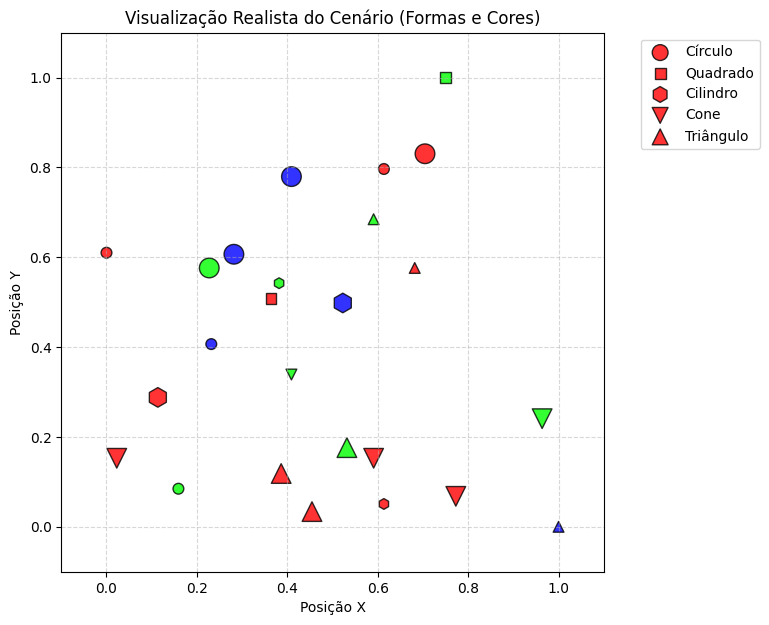

In [ ]:
# Função para Plotar o Cenário
def plot_scenario_with_shapes(data):
    # Converter Tensor para Numpy para poder manipular
    np_data = data.detach().cpu().numpy()

    # Extrair coordenadas
    x = np_data[:, 0]
    y = np_data[:, 1]

    # Extrair Cores (RGB está nos índices 2, 3, 4)
    colors = np_data[:, 2:5]

    # Extrair Tamanhos (Índice 10)
    # Se valor > 0.5 é Grande, senão Pequeno
    raw_sizes = np_data[:, 10]
    plot_sizes = [200 if s > 0.5 else 60 for s in raw_sizes]

    # Extrair Formas (Índices 5, 6, 7, 8, 9)
    shape_indices = np.argmax(np_data[:, 5:10], axis=1)

    # Mapeamento de Marcadores do Matplotlib
    # 'o' = Círculo
    # 's' = Quadrado (Square)
    # 'h' = Hexágono (Usaremos para Cilindro para diferenciar)
    # 'v' = Triângulo pra baixo (Usaremos para Cone)
    # '^' = Triângulo pra cima
    markers = ['o', 's', 'h', 'v', '^']
    shape_names = ["Círculo", "Quadrado", "Cilindro", "Cone", "Triângulo"]

    plt.figure(figsize=(7, 7))

    # fazemos um loop por cada tipo de forma para plotar em grupos.
    for i in range(5):

        mask = (shape_indices == i)

        if np.any(mask): # Se houver objetos dessa forma
            plt.scatter(x[mask], y[mask],
                        c=colors[mask],
                        s=np.array(plot_sizes)[mask],
                        marker=markers[i],
                        edgecolors='black',
                        label=shape_names[i],
                        alpha=0.8)

    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)
    plt.title("Visualização Realista do Cenário (Formas e Cores)")
    plt.xlabel("Posição X")
    plt.ylabel("Posição Y")
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1)) # Legenda fora do gráfico
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

plot_scenario_with_shapes(data)

In [ ]:
# Configure LTNtorch to use the appropriate device
ltn.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {ltn.device}")

Using device: cpu


In [ ]:
# DEFINE LOGICAL CONNECTIVES AND QUANTIFIERS (REQUIRED IN LTNTORCH)
Not = ltn.Connective(ltn.fuzzy_ops.NotStandard())
And = ltn.Connective(ltn.fuzzy_ops.AndProd())
Or = ltn.Connective(ltn.fuzzy_ops.OrProbSum())
Implies = ltn.Connective(ltn.fuzzy_ops.ImpliesReichenbach())
Forall = ltn.Quantifier(ltn.fuzzy_ops.AggregPMeanError(p=2), quantifier="f")
Exists = ltn.Quantifier(ltn.fuzzy_ops.AggregPMean(p=2), quantifier="e")
sat_agg = ltn.fuzzy_ops.SatAgg()

Iff = ltn.Connective(ltn.fuzzy_ops.Equiv(ltn.fuzzy_ops.AndProd(), ltn.fuzzy_ops.ImpliesReichenbach()))

In [ ]:
# CREATE LTN OBJECTS (Constants and Variables)
# Em vez de criar formas manuais, usamos os dados gerados no passo anterior.

# Variável que representa "Todos os objetos do universo"
objects = ltn.Variable("objects", data)

print("Variável LTN 'objects' pronta para uso nos axiomas.")

Variável LTN 'objects' pronta para uso nos axiomas.


In [ ]:
# DEFINIÇÃO DOS MODELOS

class ColorModel(nn.Module):

    def __init__(self, color_index):
        super(ColorModel, self).__init__()
        self.color_index = color_index # Índice esperado: 0=Red, 1=Green, 2=Blue

    def forward(self, x):
        x = x.value if hasattr(x, 'value') else x

        # Pegamos apenas as cores (índices 2, 3, 4 do vetor original)
        # Para dados one-hot, retornar diretamente o valor (0.0 ou 1.0).
        features = x[..., 2:5]
        return features[..., self.color_index]


class ShapeModel(nn.Module):

    def __init__(self, shape_index):
        super(ShapeModel, self).__init__()
        self.shape_index = shape_index

    def forward(self, x):
        x = x.value if hasattr(x, 'value') else x
        # Pegamos apenas as formas (índices 5, 6, 7, 8, 9)
        # Retornar diretamente o valor one-hot (0.0 ou 1.0).
        features = x[..., 5:10]

        return features[..., self.shape_index]


class SizeModel(nn.Module):

    def __init__(self, greater_than_05=True):
        super(SizeModel, self).__init__()
        self.greater = greater_than_05

    def forward(self, x):
        x = x.value if hasattr(x, 'value') else x
        # Pegamos apenas o tamanho (índice 10)
        size_val = x[..., 10]
        if self.greater:
            # isBig (se > 0.5)
            return torch.sigmoid(20.0 * (size_val - 0.5))
        else:
            # isSmall (se <= 0.5)
            return torch.sigmoid(20.0 * (0.5 - size_val))

class SpatialModel(nn.Module):

    def __init__(self):
        super(SpatialModel, self).__init__()

        # Entrada: 4 features (x1, y1, x2, y2)
        self.net = nn.Sequential(
            nn.Linear(4, 16),
            nn.ELU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

    def forward(self, x, y):
        x_val = x.value if hasattr(x, 'value') else x
        y_val = y.value if hasattr(y, 'value') else y
        # Pega apenas posições x,y (índices 0,1)
        inputs = torch.cat([x_val[..., :2], y_val[..., :2]], dim=-1)

        return self.net(inputs).squeeze()


# MODELOS FIXOS
class CloseToModel(nn.Module):
    # Proximidade por Kernel Gaussiano.
    # sigma=0.5 resulta no coeficiente 2 exigido na fórmula
    def __init__(self, sigma=0.5):
        super().__init__()
        self.sigma = sigma

    def forward(self, x, y):
        x_val = x.value if hasattr(x, 'value') else x
        y_val = y.value if hasattr(y, 'value') else y

        dx = x_val[..., 0] - y_val[..., 0]
        dy = x_val[..., 1] - y_val[..., 1]
        dist2 = dx*dx + dy*dy

        return torch.exp(-dist2 / (2.0 * (self.sigma ** 2)))

class SameSizeModel(nn.Module):
    # Similaridade de tamanho fixa: 1 - |size_x - size_y|.
    def forward(self, x, y):
        x_val = x.value if hasattr(x, 'value') else x
        y_val = y.value if hasattr(y, 'value') else y
        sx = x_val[..., 10]
        sy = y_val[..., 10]

        return 1.0 - torch.abs(sx - sy)

class LeftTruthModel(torch.nn.Module):
    def forward(self, x, y):
        x_val = x.value if hasattr(x, 'value') else x
        y_val = y.value if hasattr(y, 'value') else y
        # Lógica: sigmoid((y_x - x_x) * 15)
        return torch.sigmoid((y_val[:, 0] - x_val[:, 0]) * 15.0)

class BelowTruthModel(torch.nn.Module):
    def forward(self, x, y):
        x_val = x.value if hasattr(x, 'value') else x
        y_val = y.value if hasattr(y, 'value') else y
        # Lógica: sigmoid((y_y - x_y) * 15)
        return torch.sigmoid((y_val[:, 1] - x_val[:, 1]) * 15.0)

# 2. Predicado de desigualdade para evitar auto-comparações
class NotEqualModel(nn.Module):
    def forward(self, a, b):
        a_val = a.value if hasattr(a, 'value') else a
        b_val = b.value if hasattr(b, 'value') else b
        # Verdade baixa quando todos elementos são iguais
        eq = torch.all(torch.isclose(a_val, b_val, atol=1e-6), dim=-1)
        return (~eq).float()

### Predicados

In [ ]:
# Cores (Indices no slice 2:5 -> 0, 1, 2)
isRed   = ltn.Predicate(ColorModel(0))
isGreen = ltn.Predicate(ColorModel(1))
isBlue  = ltn.Predicate(ColorModel(2))

# Formas (Indices no slice 5:10 -> 0..4)
# Ordem gerada: ["Circle", "Square", "Cylinder", "Cone", "Triangle"]
isCircle   = ltn.Predicate(ShapeModel(0))
isSquare   = ltn.Predicate(ShapeModel(1))
isCylinder = ltn.Predicate(ShapeModel(2))
isCone     = ltn.Predicate(ShapeModel(3))
isTriangle = ltn.Predicate(ShapeModel(4))

# Tamanhos
isBig   = ltn.Predicate(SizeModel(greater_than_05=True))
isSmall = ltn.Predicate(SizeModel(greater_than_05=False))

# Espaciais (Treináveis)
leftOf  = ltn.Predicate(SpatialModel())
rightOf = ltn.Predicate(SpatialModel())
below   = ltn.Predicate(SpatialModel())
above   = ltn.Predicate(SpatialModel())


# Definições Auxiliares da Tarefa 2 (Raciocínio Horizontal)

# 1. closeTo(x, y)
closeTo = ltn.Predicate(CloseToModel())

# 2. inBetween(x, y, z): x está entre y e z
# Fórmula: (Left(y,x) E Right(z,x)) OU (Left(z,x) E Right(y,x))
def inBetween(x, y, z):
    cond1 = And(leftOf(y, x), rightOf(z, x))
    cond2 = And(leftOf(z, x), rightOf(y, x))
    return Or(cond1, cond2)

# 3. lastOnTheLef t(x) (Objeto mais a esquerda de todos):
def lastOnTheLeft(x, y):
    # Lógica: Se y não é o próprio x, então x TEM que estar à esquerda de y
    return Implies(notEqual(x, y), leftOf(x, y))

# 4. lastOnTheRight(x) (Objeto mais a direita de todos):
def lastOnTheRight(x, y):
    # Lógica: Se y não é o próprio x, então x TEM que estar à direita de y
    return Implies(notEqual(x, y), rightOf(x, y))

# Auxiliar
left_ground_truth = ltn.Predicate(LeftTruthModel())
below_ground_truth = ltn.Predicate(BelowTruthModel())
sameSize = ltn.Predicate(SameSizeModel())
notEqual = ltn.Predicate(NotEqualModel())

In [ ]:
# Definição da Regra de Empilhamento (canStack)
def canStack(x, y):
    # Parte A: Restrição de Forma da Base (y)
    # y não pode ser Cone NEM Triângulo
    valid_base_shape = Not(Or(isCone(y), isTriangle(y)))

    # Parte B: Restrição de Equilíbrio Estável
    # "forem de mesmas dimensões OU o centroide de x estiver em distância estável (CloseTo)"
    # Usamos or para indicar que basta uma das duas ser verdade
    is_stable = Or(sameSize(x, y), closeTo(x, y))

    # Combina as duas condições: Forma Válida E Estabilidade
    return And(valid_base_shape, is_stable)


### Axiomas

In [ ]:
def axioms():
    axioms_list = []

    # TAREFA 1: TAXONOMIA

    # Forma Única
    shapes = [isCircle, isSquare, isCylinder, isCone, isTriangle]
    for i in range(len(shapes)):
        for j in range(i + 1, len(shapes)):
            axioms_list.append(Forall(objects, Not(And(shapes[i](objects), shapes[j](objects)))))

    # Cobertura (Completude)
    axioms_list.append(Forall(objects, Or(isCircle(objects), Or(isSquare(objects), Or(isCylinder(objects), Or(isCone(objects), isTriangle(objects)))))))

    colors = [isRed, isGreen, isBlue]
    for i in range(len(colors)):
        for j in range(i + 1, len(colors)):
            axioms_list.append(Forall(objects, Not(And(colors[i](objects), colors[j](objects)))))

    axioms_list.append(Forall(objects, Or(isRed(objects), Or(isGreen(objects), isBlue(objects)))))

    axioms_list.append(Forall(objects, Iff(isSmall(objects), Not(isBig(objects)))))

    # VARIÁVEIS AUXILIARES
    x = ltn.Variable("x", data)
    y = ltn.Variable("y", data)
    z = ltn.Variable("z", data)

    # TAREFA 2: ESPACIAL HORIZONTAL
    # Treina o leftOf
    axioms_list.append(Forall([x, y],
                              Iff(leftOf(x, y), left_ground_truth(x, y))))

    # Irreflexividade:
    axioms_list.append(Forall(x, Not(leftOf(x, x))))
    # Assimetria:
    axioms_list.append(Forall([x, y], Implies(leftOf(x, y), Not(leftOf(y, x)))))
    # Inverso:
    axioms_list.append(Forall([x, y], Iff(leftOf(x, y), rightOf(y, x))))
    # Transitividade:
    axioms_list.append(Forall([x, y, z], Implies(And(leftOf(x, y), leftOf(y, z)), leftOf(x, z))))

    # TAREFA 3: ESPACIAL VERTICAL
    # Treina o below
    axioms_list.append(Forall([x, y],
                              Iff(below(x, y), below_ground_truth(x, y))))

    # Inverso:
    axioms_list.append(Forall([x, y], Iff(below(x, y), above(y, x))))
    # Transitividade:
    axioms_list.append(Forall([x, y, z], Implies(And(below(x, y), below(y, z)), below(x, z))))

    # TAREFA 4: REGRA COMPOSTA
    axioms_list.append(Forall([x, y], Implies(And(isSquare(x), isCircle(y)), rightOf(x, y))))
    axioms_list.append(Forall([x, y], Implies(And(isTriangle(x), And(isTriangle(y), closeTo(x, y))), sameSize(x, y))))

    return sat_agg(*axioms_list)

### Perguntas e Fórmulas

In [ ]:
# QUERYING THE KNOWLEDGE BASE
def query_knowledge_base():
    print("\n=== TAREFA 2: CONSULTAS DE RACIOCÍNIO HORIZONTAL ===")

    # Variáveis para as queries
    x = ltn.Variable("x", data)
    y = ltn.Variable("y", data)

    # 1. LastOnTheLeft: Existe x tal que para todo y!=x, LeftOf(x,y)
    query_last_left = Exists(x, Forall(y, lastOnTheLeft(x, y)))
    print(f"1. LastOnTheLeft: 'Existe objeto mais à Esquerda' (irreflexivo): {query_last_left.value.item():.4f}")

    # 2. LastOnTheRight: Existe x tal que para todo y!=x, RightOf(x,y)
    query_last_right = Exists(x, Forall(y, lastOnTheRight(x, y)))
    print(f"2. LastOnTheRight: 'Existe objeto mais à Direita' (irreflexivo): {query_last_right.value.item():.4f}")

    # Opcionais:
    # 3. "Existe um objeto à Esquerda de todos os Quadrados?" (exclui auto)
    query_existential = Exists([x], Forall([y], Implies(And(isSquare(y), notEqual(x, y)), leftOf(x, y))))
    print(f"3. Consulta Existencial: Esq de todos os Quadrados (exclui auto): {query_existential.value.item():.4f}")

    # 4. A Restrição Quadrado-Círculo:
    # Pergunta: "É verdade que todo quadrado está à direita de todo círculo?"
    query_square_circle = Forall([x, y], Implies(And(isSquare(x), isCircle(y)), rightOf(x, y)))

    print(f"4. A Restrição Quadrado-Círculo: Regra Quadrado à Dir de Círculo: {query_square_circle.value.item():.4f}")


    print("\n=== TESTE UNITÁRIO: CLOSETO e INBETWEEN ===")

    # 1. Criar dados manuais

    # Objeto A: Esquerda (x=0.1, y=0.5)
    vec_a = torch.zeros(11)
    vec_a[0], vec_a[1] = 0.1, 0.5

    # Objeto B: Meio (x=0.5, y=0.5)
    vec_b = torch.zeros(11)
    vec_b[0], vec_b[1] = 0.5, 0.5

    # Objeto C: Direita (x=0.9, y=0.5)
    vec_c = torch.zeros(11)
    vec_c[0], vec_c[1] = 0.9, 0.5

    # Objeto D: Muito Perto de A (x=0.12, y=0.5) -> Diferença 0.02
    vec_d = torch.zeros(11)
    vec_d[0], vec_d[1] = 0.12, 0.5

    # Transformar em Constantes do LTN para passar aos predicados
    obj_a = ltn.Constant(vec_a.unsqueeze(0))
    obj_b = ltn.Constant(vec_b.unsqueeze(0))
    obj_c = ltn.Constant(vec_c.unsqueeze(0))
    obj_d = ltn.Constant(vec_d.unsqueeze(0))

    # --- TESTE 1: CLOSETO ---
    score_perto = closeTo(obj_a, obj_d).value.item()
    score_longe = closeTo(obj_a, obj_c).value.item()

    print(f"Teste CloseTo (Perto 0.02): {score_perto:.4f} (Esperado: > 0.8)")
    print(f"Teste CloseTo (Longe 0.80): {score_longe:.4f} (Esperado: < 0.3)")

    # --- TESTE 2: INBETWEEN ---
    score_between_certo = inBetween(obj_b, obj_a, obj_c).value.item()
    score_between_errado = inBetween(obj_a, obj_b, obj_c).value.item()

    print(f"Teste InBetween (B entre A e C): {score_between_certo:.4f} (Esperado: Alto)")
    print(f"Teste InBetween (A entre B e C): {score_between_errado:.4f} (Esperado: Baixo)")


In [ ]:
def query_canStack():
    print("\n=== TAREFA 3: TESTE DE EMPILHAMENTO (canStack) ===")

    # Variáveis auxiliares
    # Precisamos de x e y para testar pares
    x = ltn.Variable("x", data)
    y = ltn.Variable("y", data)

    # 1. Consulta de Validação (Cilindro)
    # Testamos com (y, y) pois um objeto tem mesmo tamanho e está perto de si mesmo,
    # isolando o teste apenas para a "Forma da Base".
    # Deve dar alto (perto de 1.0)
    query_valid_base = Forall([y],
                              Implies(isCylinder(y), canStack(y, y)))

    print(f"1. Verificação (Se base é Cilindro, Pode?): {query_valid_base.value.item():.4f}")

    # 2. Consulta de Proibição (Cone)
    # Deve dar baixo (perto de 0.0)
    query_invalid_base = Forall([y],
                                And(isCone(y), canStack(y, y)))

    print(f"2. Verificação (Se base é Cone, Pode?): {query_invalid_base.value.item():.4f}")
    print("   (Nota: Valor baixo é CORRETO, pois a regra proíbe cones na base)")

    # 3. Exemplo Existencial
    # "Existe algum par (x, y) que pode ser empilhado?"
    query_exists = Exists([x, y],
                          canStack(x, y))

    print(f"3. Existência de qualquer par empilhável válido: {query_exists.value.item():.4f}")

def queries_task_4():
    print("\n TAREFA 4: RACIOCÍNIO COMPOSTO")

    # Variáveis auxiliares para iterar sobre o conjunto de objetos
    x = ltn.Variable("x", data)
    y = ltn.Variable("y", data)
    z = ltn.Variable("z", data)

    # 1. Filtragem Composta
    # "Existe algum objeto Pequeno (x) que esteja Abaixo de um Cilindro (y)
    #  E à Esquerda de um Quadrado (z)?"

    condicao_y = Exists(y, And(isCylinder(y), below(x, y)))
    condicao_z = Exists(z, And(isSquare(z), leftOf(x, z)))

    query1 = Exists(x,
                    And(isSmall(x),
                        And(condicao_y, condicao_z)))

    print(f"1. Filtragem Composta (Pequeno, Abaixo de Cilindro, Esq de Quadrado): {query1.value.item():.4f}")

    # 2. Dedução de Posição Absoluta
    # "Existe um Cone Verde que está Entre (InBetween) dois outros objetos quaisquer?"

    query2 = Exists([x, y, z],
                    And(isCone(x),
                        And(isGreen(x),
                            inBetween(x, y, z))))

    print(f"2. Dedução (Cone Verde Entre dois objetos): {query2.value.item():.4f}")

    # 3. Restrição de Proximidade
    check_rule = Forall([x, y],
               Implies(And(isTriangle(x), And(isTriangle(y), closeTo(x, y))),
                       sameSize(x, y)))
    print(f"3. Verificação da Regra (Triângulos Próximos = Mesmo Tamanho): {check_rule.value.item():.4f}")

### Treinamento e Resultados

- Resultados do treinamento do dataset feito em sala, usado para treino.

- #### **Ao final do notebook terá os resultados para 5 execuções dos passos 3.2 e 3.3 para 5 dataset aleatórios distintos.**

In [ ]:
# SATISFIABILITY CHECKING (Reasoning)
def check_satisfiability():
    # Get the satisfaction level of our knowledge base
    sat_level = axioms()
    print(f"Knowledge base satisfaction level: {sat_level.item():.4f}")

    return sat_level


In [ ]:
# TRAINING THE PREDICATES (Learning from data)
def train_predicates(epochs):
    # Coletar parâmetros de todos os predicados treináveis
    parameters = []

    unary_preds = [isCircle, isSquare, isCylinder, isCone, isTriangle, # Formas
                   isRed, isGreen, isBlue,                             # Cores
                   isSmall, isBig]                                     # Tamanhos

    for p in unary_preds:
        parameters += list(p.model.parameters())

    # Binários
    binary_preds = [leftOf, rightOf, below, above]

    for p in binary_preds:
        parameters += list(p.model.parameters())

    # Inicializa o otimizador com essa lista de parâmetros
    optimizer = torch.optim.Adam(parameters, lr=0.001)

    print("\n=== TREINANDO PREDICADOS (NEURO-SIMBÓLICO) ===")
    for epoch in range(epochs):
        optimizer.zero_grad()

        # Calcula a perda baseada na satisfação dos Axiomas
        sat_level = axioms()
        sat_loss = 1.0 - sat_level

        # Backpropagation
        sat_loss.backward()
        optimizer.step()

        # Monitoramento
        if epoch % 50 == 0:
            print(f"Epoch {epoch}: Satisfação da KB = {sat_level.item():.4f}")


In [ ]:
# RUN THE COMPLETE EXPERIMENT
import torch.optim as optim

print(f"{'='*40}")
print("\n EXECUTANDO EXPERIMENTO COMPLETO")
print(f"{'='*40}")

# 1. RESETAR MODELOS
isCircle.model = ShapeModel(0)
isSquare.model = ShapeModel(1)
isCylinder.model = ShapeModel(2)
isCone.model = ShapeModel(3)
isTriangle.model = ShapeModel(4)

isRed.model = ColorModel(0)
isGreen.model = ColorModel(1)
isBlue.model = ColorModel(2)

isSmall.model = SizeModel(False)
isBig.model = SizeModel(True)

leftOf.model = SpatialModel()
rightOf.model = SpatialModel()
below.model = SpatialModel()
above.model = SpatialModel()

# 2. TREINAMENTO
print("\n--> Iniciando Treinamento do Zero...")
train_predicates(epochs=5500)

# 3. VERIFICAÇÃO FINAL
final_sat = check_satisfiability()
print(f"\n--> Satisfação Final Pós-Treino: {final_sat.item():.4f}")

# 4. RODAR AS CONSULTAS
print("\n--> Executando Consultas de Raciocínio e suas SATISFABILIDADES...")
print("\n=== SATISFATIBILIDADE (SatAgg) DAS PERGUNTAS ===")

if 'query_knowledge_base' in globals():
    query_knowledge_base()

# Tarefa 3 (CanStack)
query_canStack()

# Tarefa 4 (Compostas)
if 'queries_task_4' in globals():
    queries_task_4()

print(f"\n{'='*40}")
print(f"RESULTADO FINAL: {final_sat.item():.4f}")
print(f"{'='*40}")

print("\n=== KEY INSIGHTS ABOUT LTNObjects ===")
print("1. LTNObjects wrap tensors with logical meaning")
print("2. Constants represent specific entities")
print("3. Variables represent quantifiable sets")
print("4. Predicates map LTNObjects to truth values [0,1]")
print("5. Logical connectives (And, Or, Not, Implies) work on truth values")
print("6. Quantifiers (Forall, Exists) aggregate over variables")
print("7. In LTNTorch, you must explicitly define all logical connectives")
print("8. The SatAgg function combines multiple axioms into a single satisfaction score")


 EXECUTANDO EXPERIMENTO COMPLETO

--> Iniciando Treinamento do Zero...

=== TREINANDO PREDICADOS (NEURO-SIMBÓLICO) ===
Epoch 0: Satisfação da KB = 0.7943
Epoch 50: Satisfação da KB = 0.8079
Epoch 100: Satisfação da KB = 0.8197
Epoch 150: Satisfação da KB = 0.8283
Epoch 200: Satisfação da KB = 0.8331
Epoch 250: Satisfação da KB = 0.8365
Epoch 300: Satisfação da KB = 0.8391
Epoch 350: Satisfação da KB = 0.8412
Epoch 400: Satisfação da KB = 0.8430
Epoch 450: Satisfação da KB = 0.8447
Epoch 500: Satisfação da KB = 0.8461
Epoch 550: Satisfação da KB = 0.8472
Epoch 600: Satisfação da KB = 0.8480
Epoch 650: Satisfação da KB = 0.8486
Epoch 700: Satisfação da KB = 0.8489
Epoch 750: Satisfação da KB = 0.8492
Epoch 800: Satisfação da KB = 0.8493
Epoch 850: Satisfação da KB = 0.8495
Epoch 900: Satisfação da KB = 0.8496
Epoch 950: Satisfação da KB = 0.8497
Epoch 1000: Satisfação da KB = 0.8497
Epoch 1050: Satisfação da KB = 0.8498
Epoch 1100: Satisfação da KB = 0.8499
Epoch 1150: Satisfação da KB 

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_metrics(data, objects_var, predicates_dict):
    """
    Calcula métricas de classificação comparando as previsões do LTN
    com o Ground Truth extraído do tensor de dados.
    """
    # 1. Extrair Ground Truth do Tensor de Dados
    np_data = data.detach().cpu().numpy()

    gt = {
        'isRed':    np_data[:, 2] == 1.0,
        'isGreen':  np_data[:, 3] == 1.0,
        'isBlue':   np_data[:, 4] == 1.0,
        'isCircle':   np_data[:, 5] == 1.0,
        'isSquare':   np_data[:, 6] == 1.0,
        'isCylinder': np_data[:, 7] == 1.0,
        'isCone':     np_data[:, 8] == 1.0,
        'isTriangle': np_data[:, 9] == 1.0,
        'isBig':    np_data[:, 10] > 0.5,
        'isSmall':  np_data[:, 10] <= 0.5
    }

    print(f"\n{'Predicado':<15} | {'Acc':<8} | {'Prec':<8} | {'Rec':<8} | {'F1':<8}")
    print("-" * 65)

    metrics_storage = {}

    for name, predicate in predicates_dict.items():
        if name not in gt:
            continue

        # 2. Obter Previsão da Rede
        # O predicado retorna probabilidade [0.0, 1.0].
        predictions_prob = predicate(objects_var).value.detach().cpu().numpy()
        predictions_bin = predictions_prob > 0.5

        y_true = gt[name]

        # 3. Calcular Métricas
        acc = accuracy_score(y_true, predictions_bin)
        prec = precision_score(y_true, predictions_bin, zero_division=0)
        rec = recall_score(y_true, predictions_bin, zero_division=0)
        f1 = f1_score(y_true, predictions_bin, zero_division=0)

        metrics_storage[name] = {'acc': acc, 'f1': f1}

        print(f"{name:<15} | {acc:.4f}   | {prec:.4f}   | {rec:.4f}   | {f1:.4f}")

    return metrics_storage

preds_dict = {
         'isRed': isRed, 'isGreen': isGreen, 'isBlue': isBlue,
     'isCircle': isCircle, 'isSquare': isSquare, 'isCylinder': isCylinder,
     'isCone': isCone, 'isTriangle': isTriangle,
     'isSmall': isSmall, 'isBig': isBig
 }
evaluate_metrics(data, objects, preds_dict)


def evaluate_satisfiability(data, objects_var):
    print("\n=== SATISFATIBILIDADE (SatAgg) DAS FÓRMULAS ===")

    x = ltn.Variable("x", data)
    y = ltn.Variable("y", data)
    z = ltn.Variable("z", data)

    # Dicionário com todas as fórmulas exigidas
    formulas = {

        "Forma_Unica": Forall(x, Not(And(isCircle(x), isSquare(x)))),
        "Cobertura": Forall(x, Or(isCircle(x), Or(isSquare(x), Or(isCylinder(x), Or(isCone(x), isTriangle(x)))))),
        "Axioma_Irreflexivo": Forall(x, Not(leftOf(x, x))),
        "Axioma_Assimetria": Forall([x, y], Implies(leftOf(x, y), Not(leftOf(y, x)))),
        "Axioma_Inverso": Forall([x, y], Iff(leftOf(x, y), rightOf(y, x))),
        "Axioma_Transitivo": Forall([x, y, z], Implies(And(leftOf(x, y), leftOf(y, z)), leftOf(x, z))),
        "Axioma_Inverso_Vert": Forall([x, y], Iff(below(x, y), above(y, x))),
        "Axioma_Transitivo_Vert": Forall([x, y, z], Implies(And(below(x, y), below(y, z)),below(x, z))),
    }

    print(f"{'Fórmula ':<40} | {'SatAgg':<10}")
    print("-" * 55)

    for name, formula in formulas.items():
        sat_val = formula.value.item()
        print(f"{name:<40} | {sat_val:.4f}")

evaluate_satisfiability(data, objects)


Predicado       | Acc      | Prec     | Rec      | F1      
-----------------------------------------------------------------
isRed           | 1.0000   | 1.0000   | 1.0000   | 1.0000
isGreen         | 1.0000   | 1.0000   | 1.0000   | 1.0000
isBlue          | 1.0000   | 1.0000   | 1.0000   | 1.0000
isCircle        | 1.0000   | 1.0000   | 1.0000   | 1.0000
isSquare        | 1.0000   | 1.0000   | 1.0000   | 1.0000
isCylinder      | 1.0000   | 1.0000   | 1.0000   | 1.0000
isCone          | 1.0000   | 1.0000   | 1.0000   | 1.0000
isTriangle      | 1.0000   | 1.0000   | 1.0000   | 1.0000
isSmall         | 1.0000   | 1.0000   | 1.0000   | 1.0000
isBig           | 1.0000   | 1.0000   | 1.0000   | 1.0000

=== SATISFATIBILIDADE (SatAgg) DAS FÓRMULAS ===
Fórmula                                  | SatAgg    
-------------------------------------------------------
Forma_Unica                              | 0.9999
Cobertura                                | 0.9996
Axioma_Irreflexivo                

In [ ]:
# VERIFICAÇÃO DOS RESULTADOS
#TESTE 1

device = ltn.device

print("Teste A: Verificação Manual Espacial")

# 1. Criar os Tensores (Dados brutos)
# Formato: [x, y, r, g, b, s1, s2, s3, s4, s5, size]
# Objeto A: Posição x=0.2 (Esquerda)
tensor_A = torch.tensor([[0.2, 0.5, 1, 0, 0, 1, 0, 0, 0, 0, 1.0]], dtype=torch.float32).to(device)
# Objeto B: Posição x=0.8 (Direita)
tensor_B = torch.tensor([[0.8, 0.5, 0, 1, 0, 0, 1, 0, 0, 0, 1.0]], dtype=torch.float32).to(device)

# 2. Converter para Constantes Lógicas (LTNObject)
obj_A = ltn.Constant(tensor_A)
obj_B = ltn.Constant(tensor_B)

# 3. Fazer as perguntas
# Pergunta: A está à esquerda de B?
prediction_correct = leftOf(obj_A, obj_B)
print(f"Predição: A leftOf B (Esperado > 0.8): {prediction_correct.value.item():.4f}")

# Pergunta: B está à esquerda de A?
prediction_wrong = leftOf(obj_B, obj_A)
print(f"Predição: B leftOf A (Esperado < 0.2): {prediction_wrong.value.item():.4f}")

# Validação Rápida
if prediction_correct.value.item() > 0.8 and prediction_wrong.value.item() < 0.2:
    print(" Resultado: O modelo aprendeu a direção corretamente!")
else:
    print(" Resultado: O modelo parece confuso ou colapsado.")

# TESTE 2
print("\n Teste B: Verificação de Exclusividade (Cores e Formas)")

# Pergunta: O objeto A é Vermelho?
val_red = isRed(obj_A)
print(f"É Vermelho? (Esperado ~1.0): {val_red.value.item():.4f}")

# Pergunta: O objeto A é Azul?
val_blue = isBlue(obj_A)
print(f"É Azul? (Esperado ~0.0): {val_blue.value.item():.4f}")

# Pergunta: O objeto A é Círculo?
val_circle = isCircle(obj_A)
print(f"É Círculo? (Esperado ~1.0): {val_circle.value.item():.4f}")

# Pergunta: O objeto B é Círculo?
val_circleB = isCircle(obj_B)
print(f"É Círculo? (Esperado ~0.0): {val_circleB.value.item():.4f}")

if val_red.value.item() > 0.8 and val_blue.value.item() < 0.2:
    print(" Resultado: Exclusividade de cores funcionando.")
else:
    print(" Resultado: Problema na distinção de cores.")



Teste A: Verificação Manual Espacial
Predição: A leftOf B (Esperado > 0.8): 1.0000
Predição: B leftOf A (Esperado < 0.2): 0.0000
 Resultado: O modelo aprendeu a direção corretamente!

 Teste B: Verificação de Exclusividade (Cores e Formas)
É Vermelho? (Esperado ~1.0): 1.0000
É Azul? (Esperado ~0.0): 0.0000
É Círculo? (Esperado ~1.0): 1.0000
É Círculo? (Esperado ~0.0): 0.0000
 Resultado: Exclusividade de cores funcionando.


In [ ]:
device = ltn.device

print("========================================")
print("   BATERIA DE TESTES AVANÇADOS LTN")
print("========================================")

# CONFIGURAÇÃO DOS DADOS DE TESTE (MANUAL)
# Vamos criar objetos "fakes" com coordenadas exatas para testar a lógica

# Objeto 1: Canto Inferior Esquerdo (0.2, 0.2)
t1 = torch.tensor([[0.2, 0.2, 1,0,0, 1,0,0,0,0, 1.0]], device=device)
o1 = ltn.Constant(t1)

# Objeto 2: Centro (0.5, 0.5)
t2 = torch.tensor([[0.5, 0.5, 0,1,0, 0,1,0,0,0, 1.0]], device=device)
o2 = ltn.Constant(t2)

# Objeto 3: Canto Superior Direito (0.8, 0.8)
t3 = torch.tensor([[0.8, 0.8, 0,0,1, 0,0,1,0,0, 1.0]], device=device)
o3 = ltn.Constant(t3)

# Objeto 4: Muito perto do Objeto 2 (0.52, 0.52) -> Para testar CloseTo
t4 = torch.tensor([[0.52, 0.52, 1,1,0, 0,0,0,1,0, 1.0]], device=device)
o4 = ltn.Constant(t4)


# TESTE 1: VERTICALIDADE (Below / Above)
print("\n[1] TESTE VERTICAL (Below/Above)")

# O1 (y=0.2) está abaixo de O3 (y=0.8)?
res_below = below(o1, o3).value.item()
print(f"   Below(0.2, 0.8): {res_below:.4f}  [Esperado: > 0.90]")

# O3 (y=0.8) está acima de O1 (y=0.2)?
res_above = above(o3, o1).value.item()
print(f"   Above(0.8, 0.2): {res_above:.4f}  [Esperado: > 0.90]")

# Teste Falso: O3 está abaixo de O1?
res_fail = below(o3, o1).value.item()
print(f"   Below(0.8, 0.2): {res_fail:.4f}  [Esperado: < 0.10]")

if res_below > 0.8 and res_fail < 0.2:
    print("    Verticalidade APROVADA")
else:
    print("    Falha na Verticalidade")


# TESTE 2: TRANSITIVIDADE ESPACIAL
print("\n[2] TESTE DE TRANSITIVIDADE (LeftOf)")
# Lógica: O1(x=0.2) < O2(x=0.5) E O2(x=0.5) < O3(x=0.8)

is_1_left_2 = leftOf(o1, o2).value.item()
is_2_left_3 = leftOf(o2, o3).value.item()
is_1_left_3 = leftOf(o1, o3).value.item()

print(f"   Left(A, B): {is_1_left_2:.4f}")
print(f"   Left(B, C): {is_2_left_3:.4f}")
print(f"   Left(A, C): {is_1_left_3:.4f}  [Inferência Esperada: > 0.90]")

if is_1_left_3 > 0.9:
    print("    Transitividade APROVADA")
else:
    print("    Transitividade Fraca")


# TESTE 3: PROXIMIDADE (CloseTo)
print("\n[3] TESTE DE PROXIMIDADE (CloseTo)")

res_close = closeTo(o2, o4).value.item()
print(f"   CloseTo(Perto): {res_close:.4f}  [Esperado: Alto, ex: > 0.8]")

res_far = closeTo(o1, o3).value.item()
print(f"   CloseTo(Longe): {res_far:.4f}  [Esperado: Baixo, ex: < 0.3]")

if res_close > 0.5 and res_far < 0.3:
    print("    Kernel Gaussiano APROVADO")
else:
    print(f"    Atenção: Verifique seu Sigma. O modelo acha que perto={res_close:.2f}")


# TESTE 4: CHECAGEM CRUZADA (Diagonal)
print("\n[4] TESTE MISTO (LeftOf E Below)")

# O1 (0.2, 0.2) deve estar à esquerda E abaixo de O3 (0.8, 0.8)
t_mixed = And(leftOf(o1, o3), below(o1, o3))

print(f"   LeftOf AND Below: {t_mixed.value.item():.4f} [Esperado: ~1.0]")

   BATERIA DE TESTES AVANÇADOS LTN

[1] TESTE VERTICAL (Below/Above)
   Below(0.2, 0.8): 1.0000  [Esperado: > 0.90]
   Above(0.8, 0.2): 1.0000  [Esperado: > 0.90]
   Below(0.8, 0.2): 0.0000  [Esperado: < 0.10]
    Verticalidade APROVADA

[2] TESTE DE TRANSITIVIDADE (LeftOf)
   Left(A, B): 1.0000
   Left(B, C): 1.0000
   Left(A, C): 1.0000  [Inferência Esperada: > 0.90]
    Transitividade APROVADA

[3] TESTE DE PROXIMIDADE (CloseTo)
   CloseTo(Perto): 0.9984  [Esperado: Alto, ex: > 0.8]
   CloseTo(Longe): 0.2369  [Esperado: Baixo, ex: < 0.3]
    Kernel Gaussiano APROVADO

[4] TESTE MISTO (LeftOf E Below)
   LeftOf AND Below: 1.0000 [Esperado: ~1.0]


## Setup for Equality Experiments

In [ ]:
print("\n" + "="*50)
print("EXTENSION: DIFFERENT FORMS OF EQUALITY IN LTN")
print("="*50)

# Definindo conectivos lógicos específicos para os experimentos de igualdade
# (Mantemos separados para não interferir no treino principal)
Not_eq = ltn.Connective(ltn.fuzzy_ops.NotStandard())
And_eq = ltn.Connective(ltn.fuzzy_ops.AndProd())
Or_eq = ltn.Connective(ltn.fuzzy_ops.OrProbSum())
Implies_eq = ltn.Connective(ltn.fuzzy_ops.ImpliesReichenbach())
Forall_eq = ltn.Quantifier(ltn.fuzzy_ops.AggregPMeanError(p=2), quantifier="f")
Exists_eq = ltn.Quantifier(ltn.fuzzy_ops.AggregPMean(p=2), quantifier="e")
sat_agg_eq = ltn.fuzzy_ops.SatAgg()

# CRIAÇÃO DE DADOS COMPATÍVEIS COM O TRABALHO (11 Dimensões)
# Estrutura: [x, y,  r, g, b,  circle, square, cylinder, cone, triangle,  size]

# 1. Objeto Vermelho Padrão (Círculo)
vec_red1 = [0.50, 0.50,  1.0, 0.0, 0.0,  1.0, 0.0, 0.0, 0.0, 0.0,  0.5]

# 2. Objeto Vermelho "Quase Igual" (Ligeira variação na posição e no tom de vermelho)
#    Isso serve para testar se a igualdade é "Fuzzy" (flexível) ou rígida
vec_red2 = [0.51, 0.51,  0.95, 0.05, 0.0,  1.0, 0.0, 0.0, 0.0, 0.0,  0.5]

# 3. Objeto Azul (Quadrado) - Totalmente diferente
vec_blue = [0.10, 0.10,  0.0, 0.0, 1.0,  0.0, 1.0, 0.0, 0.0, 0.0,  0.5]

# 4. Objeto Verde (Triângulo)
vec_green = [0.90, 0.90,  0.0, 1.0, 0.0,  0.0, 0.0, 0.0, 0.0, 1.0,  0.8]

# Criando as Constantes LTN
# Nota: Removemos 'trainable=True' pois aqui queremos testar a lógica sobre dados fixos
red_object1 = ltn.Constant(torch.tensor(vec_red1, device=ltn.device))
red_object2 = ltn.Constant(torch.tensor(vec_red2, device=ltn.device))
blue_object = ltn.Constant(torch.tensor(vec_blue, device=ltn.device))

# Criando a Variável 'objects' para quantificação (Universo de teste da igualdade)
batch_data = torch.tensor([
    vec_red1,
    vec_red2,
    vec_blue,
    vec_green
], device=ltn.device)

objects_eq = ltn.Variable("objects_eq", batch_data)

print("Equality experiment setup complete! (Data structure adjusted to 11 features)")
print(f"Sample vector (Red1): {vec_red1}")


EXTENSION: DIFFERENT FORMS OF EQUALITY IN LTN
Equality experiment setup complete! (Data structure adjusted to 11 features)
Sample vector (Red1): [0.5, 0.5, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.5]


## 1 LTN Diagonal Equality Implementation

In [ ]:
print("\n" + "-"*30)
print("1. LTN DIAGONAL EQUALITY")
print("-"*30)

class DiagonalEquality(nn.Module):
    """Implements diagonal equality using LTN's diag function"""
    def forward(self, x, y):
        # Handle LTNObject inputs
        x_val = x.value if hasattr(x, 'value') else x
        y_val = y.value if hasattr(y, 'value') else y

        # Create diagonal pairs and compute similarity
        # For simplicity, we use cosine similarity on the diagonal
        cos_sim = torch.nn.functional.cosine_similarity(x_val, y_val, dim=-1)
        return 0.5 * (cos_sim + 1.0)  # Normalize to [0,1]

# Create diagonal equality predicate
Equal_Diag = ltn.Predicate(DiagonalEquality().to(ltn.device))

def axioms_withEquality_Diag():
    """Knowledge base using diagonal equality"""
    # Basic equality axioms
    axioms = [
        # Reflexivity: every object should be equal to itself
        Forall_eq(objects_eq, Equal_Diag(objects_eq, objects_eq)),

        # Symmetry example: if object1 equals object2, then object2 equals object1
        Equal_Diag(red_object1, red_object2),
        Equal_Diag(red_object2, red_object1),

        # Transitivity example (simplified)
        Implies_eq(
            And_eq(Equal_Diag(red_object1, red_object2), Equal_Diag(red_object2, red_object1)),
            Equal_Diag(red_object1, red_object1)
        ),

        # Different objects should not be equal
        Not_eq(Equal_Diag(red_object1, blue_object))
    ]

    return sat_agg_eq(*axioms)

# Test diagonal equality
print("Testing Diagonal Equality...")
sat_diag = axioms_withEquality_Diag()
print(f"Diagonal Equality KB Satisfaction: {sat_diag.item():.4f}")

# Query specific equalities
query1 = Equal_Diag(red_object1, red_object2)
query2 = Equal_Diag(red_object1, blue_object)
print(f"Q: Are the two red objects equal? A: {query1.value.item():.4f}")
print(f"Q: Is red object equal to blue object? A: {query2.value.item():.4f}")


------------------------------
1. LTN DIAGONAL EQUALITY
------------------------------
Testing Diagonal Equality...
Diagonal Equality KB Satisfaction: 0.7450
Q: Are the two red objects equal? A: 0.9996
Q: Is red object equal to blue object? A: 0.5700


## 2 - Cosine Equality Implementation

In [ ]:
class CosineEquality(nn.Module):
    """Implements cosine similarity-based equality with learnable temperature parameter"""
    def __init__(self):
        super().__init__()
        # Learnable temperature parameter to control sharpness of similarity
        self.temperature = nn.Parameter(torch.tensor(1.0, device=ltn.device))

    def forward(self, x, y):
        # Handle LTNObject inputs
        x_val = x.value if hasattr(x, 'value') else x
        y_val = y.value if hasattr(y, 'value') else y

        # Compute cosine similarity
        # Funciona automaticamente para vetores de 11 dimensões
        cos_sim = torch.nn.functional.cosine_similarity(x_val, y_val, dim=-1)

        # Apply temperature scaling and normalize to [0,1] range
        # (cos + 1) / 2 joga o intervalo [-1, 1] para [0, 1]
        scaled_sim = torch.sigmoid(self.temperature * (cos_sim + 1.0) / 2.0)
        return scaled_sim

# Create cosine equality predicate
Equal_Cos = ltn.Predicate(CosineEquality().to(ltn.device))

def axioms_withEquality_Cos():
    """Knowledge base using cosine equality"""
    # Get learnable parameters (now includes temperature)
    parameters = list(Equal_Cos.model.parameters())
    optimizer = torch.optim.Adam(parameters, lr=0.1)  # Higher LR for temperature

    print("Training Cosine Equality...")
    for epoch in range(200):
        optimizer.zero_grad()

        # Same axioms as diagonal equality but with cosine predicate
        axioms = [
            Forall_eq(objects_eq, Equal_Cos(objects_eq, objects_eq)),  # Reflexivity

            Equal_Cos(red_object1, red_object2),               # Similar reds should be equal
            Equal_Cos(red_object2, red_object1),               # Symmetry
            Not_eq(Equal_Cos(red_object1, blue_object))        # Different objects not equal
        ]

        sat = sat_agg_eq(*axioms)
        loss = 1 - sat
        loss.backward()
        optimizer.step()

        if epoch % 50 == 0:
            print(f"Epoch {epoch}: Cosine Equality Satisfaction = {sat.item():.4f}, Temp = {Equal_Cos.model.temperature.item():.4f}")

    # Return final satisfaction
    final_axioms = [
        Forall_eq(objects_eq, Equal_Cos(objects_eq, objects_eq)),
        Equal_Cos(red_object1, red_object2),
        Not_eq(Equal_Cos(red_object1, blue_object))
    ]
    return sat_agg_eq(*final_axioms)

In [ ]:
print("\n" + "-"*30)
print("2. COSINE EQUALITY")
print("-"*30)

# Test cosine equality
sat_cos = axioms_withEquality_Cos()
print(f"Final Cosine Equality KB Satisfaction: {sat_cos.item():.4f}")

# Query specific equalities
query1 = Equal_Cos(red_object1, red_object2)
query2 = Equal_Cos(red_object1, blue_object)
print(f"Q: Are the two red objects equal (cosine)? A: {query1.value.item():.4f}")
print(f"Q: Is red object equal to blue object (cosine)? A: {query2.value.item():.4f}")


------------------------------
2. COSINE EQUALITY
------------------------------
Training Cosine Equality...
Epoch 0: Cosine Equality Satisfaction = 0.6046, Temp = 1.1000
Epoch 50: Cosine Equality Satisfaction = 0.6152, Temp = 1.4543
Epoch 100: Cosine Equality Satisfaction = 0.6152, Temp = 1.4827
Epoch 150: Cosine Equality Satisfaction = 0.6152, Temp = 1.4821
Final Cosine Equality KB Satisfaction: 0.5687
Q: Are the two red objects equal (cosine)? A: 0.8148
Q: Is red object equal to blue object (cosine)? A: 0.6995


## 3 - Euclidean Equality Implementation


In [ ]:
print("\n" + "-"*30)
print("3. EUCLIDEAN EQUALITY")
print("-"*30)

class EuclideanEquality(nn.Module):
    """Implements Euclidean distance-based equality with learnable gamma parameter"""
    def __init__(self):
        super().__init__()
        # Learnable gamma parameter for strictness
        self.gamma = nn.Parameter(torch.tensor(0.5, device=ltn.device))

    def forward(self, x, y):
        # Handle LTNObject inputs
        x_val = x.value if hasattr(x, 'value') else x
        y_val = y.value if hasattr(y, 'value') else y

        # Compute Euclidean distance
        distance = torch.sum(torch.square(x_val - y_val), dim=-1)

        # Apply exponential decay with learnable gamma
        # A similaridade decai exponencialmente conforme a distância aumenta
        similarity = torch.exp(-self.gamma * distance)

        return similarity

# Create Euclidean equality predicate
Equal_Eucl = ltn.Predicate(EuclideanEquality().to(ltn.device))

def axioms_withEquality_Eucl():
    """Knowledge base using Euclidean equality"""
    parameters = list(Equal_Eucl.model.parameters())
    optimizer = torch.optim.Adam(parameters, lr=0.1)  # Higher LR for gamma

    print("Training Euclidean Equality...")
    for epoch in range(150):
        optimizer.zero_grad()

        axioms = [
            Forall_eq(objects_eq, Equal_Eucl(objects_eq, objects_eq)),  # Reflexivity

            Equal_Eucl(red_object1, red_object2),               # Similar objects
            Equal_Eucl(red_object2, red_object1),               # Symmetry
            Not_eq(Equal_Eucl(red_object1, blue_object))        # Different objects
        ]

        sat = sat_agg_eq(*axioms)
        loss = 1 - sat
        loss.backward()
        optimizer.step()

        if epoch % 30 == 0:
            print(f"Epoch {epoch}: Euclidean Equality Satisfaction = {sat.item():.4f}, Gamma = {Equal_Eucl.model.gamma.item():.4f}")

    # Final evaluation
    final_axioms = [
        Forall_eq(objects_eq, Equal_Eucl(objects_eq, objects_eq)),
        Equal_Eucl(red_object1, red_object2),
        Not_eq(Equal_Eucl(red_object1, blue_object))
    ]
    return sat_agg_eq(*final_axioms)

# Test Euclidean equality
sat_eucl = axioms_withEquality_Eucl()
print(f"Final Euclidean Equality KB Satisfaction: {sat_eucl.item():.4f}")

# Query specific equalities
query1 = Equal_Eucl(red_object1, red_object2)
query2 = Equal_Eucl(red_object1, blue_object)
print(f"Q: Are the two red objects equal (Euclidean)? A: {query1.value.item():.4f}")
print(f"Q: Is red object equal to blue object (Euclidean)? A: {query2.value.item():.4f}")


------------------------------
3. EUCLIDEAN EQUALITY
------------------------------
Training Euclidean Equality...
Epoch 0: Euclidean Equality Satisfaction = 0.9423, Gamma = 0.6000
Epoch 30: Euclidean Equality Satisfaction = 0.9940, Gamma = 1.6158
Epoch 60: Euclidean Equality Satisfaction = 0.9944, Gamma = 1.4728
Epoch 90: Euclidean Equality Satisfaction = 0.9948, Gamma = 1.2837
Epoch 120: Euclidean Equality Satisfaction = 0.9948, Gamma = 1.2769
Final Euclidean Equality KB Satisfaction: 0.9955
Q: Are the two red objects equal (Euclidean)? A: 0.9934
Q: Is red object equal to blue object (Euclidean)? A: 0.0039


## 4 - Learnable Manifold Equality Implementation

In [ ]:
print("\n" + "-"*30)
print("4. LEARNABLE MANIFOLD EQUALITY")
print("-"*30)

class LearnableEquality(nn.Module):
    """Implements learnable equality using neural network"""
    def __init__(self, input_dim=11):
        super(LearnableEquality, self).__init__()
        # Input dim is 2 * feature_dim because of concatenation
        self.net = nn.Sequential(
            nn.Linear(input_dim * 2, 64),
            nn.ELU(),
            nn.Linear(64, 32),
            nn.ELU(),
            nn.Linear(32, 1),
            nn.Sigmoid()  # Critical: output must be in [0,1]
        )

    def forward(self, x, y):
        # Handle LTNObject inputs
        x_val = x.value if hasattr(x, 'value') else x
        y_val = y.value if hasattr(y, 'value') else y

        # Concatenate along the feature dimension
        # Junta os dois vetores de 11 dims em um vetor de 22 dims
        cat_inputs = torch.cat([x_val, y_val], dim=-1)
        return self.net(cat_inputs).squeeze()

# Create learnable equality predicate
Equal_Learned = ltn.Predicate(LearnableEquality(input_dim=11).to(ltn.device))

def axioms_withEquality_Learned():
    """Knowledge base using learnable manifold equality"""
    parameters = list(Equal_Learned.model.parameters())
    optimizer = torch.optim.Adam(parameters, lr=0.01)

    print("Training Learnable Equality Network...")
    for epoch in range(300):
        optimizer.zero_grad()

        # Complex equality axioms that require learning
        axioms = [
            # Reflexivity: every object equals itself
            Forall_eq(objects_eq, Equal_Learned(objects_eq, objects_eq)),

            # Similar objects should be equal (red objects)
            Equal_Learned(red_object1, red_object2),
            Equal_Learned(red_object2, red_object1),

            # Different objects should not be equal
            Not_eq(Equal_Learned(red_object1, blue_object)),
            Not_eq(Equal_Learned(blue_object, red_object1)),

            # Transitivity example (if A=B and B=C then A=C)
            Implies_eq(
                And_eq(Equal_Learned(red_object1, red_object2), Equal_Learned(red_object2, red_object1)),
                Equal_Learned(red_object1, red_object1)
            )
        ]

        sat = sat_agg_eq(*axioms)
        loss = 1 - sat
        loss.backward()
        optimizer.step()

        if epoch % 50 == 0:
            print(f"Epoch {epoch}: Learnable Equality Satisfaction = {sat.item():.4f}")

    # Final evaluation with more complex queries
    final_axioms = [
        Forall_eq(objects_eq, Equal_Learned(objects_eq, objects_eq)),
        Equal_Learned(red_object1, red_object2),
        Not_eq(Equal_Learned(red_object1, blue_object))
    ]
    return sat_agg_eq(*final_axioms)

# Test learnable equality
sat_learned = axioms_withEquality_Learned()
print(f"Final Learnable Equality KB Satisfaction: {sat_learned.item():.4f}")

# Query specific equalities
query1 = Equal_Learned(red_object1, red_object2)
query2 = Equal_Learned(red_object1, blue_object)
query3 = Equal_Learned(red_object1, red_object1)  # Reflexivity check

print(f"Q: Are the two red objects equal (Learned)? A: {query1.value.item():.4f}")
print(f"Q: Is red object equal to blue object (Learned)? A: {query2.value.item():.4f}")
print(f"Q: Is red object equal to itself (Learned)? A: {query3.value.item():.4f}")


------------------------------
4. LEARNABLE MANIFOLD EQUALITY
------------------------------
Training Learnable Equality Network...
Epoch 0: Learnable Equality Satisfaction = 0.5393
Epoch 50: Learnable Equality Satisfaction = 0.7959
Epoch 100: Learnable Equality Satisfaction = 0.7959
Epoch 150: Learnable Equality Satisfaction = 0.7959
Epoch 200: Learnable Equality Satisfaction = 0.7959
Epoch 250: Learnable Equality Satisfaction = 0.7959
Final Learnable Equality KB Satisfaction: 0.7113
Q: Are the two red objects equal (Learned)? A: 1.0000
Q: Is red object equal to blue object (Learned)? A: 0.0000
Q: Is red object equal to itself (Learned)? A: 1.0000


In [ ]:
print(data[20])

tensor([0.7500, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000,
        0.0000, 0.0000])


# **Resultados Finais para as 5 execuções**

#### Código para Gerar o Dataset

Este código cria a classe CLEVR_Generator e gera os vetores exatamente no formato [x, y, r, g, b, s].

In [ ]:
def get_clevr_data_expanded(n_samples):
    """
    Gera um dataset CLEVR sintético estendido para regras complexas.
    Retorna tensor de formato (n_samples, 11).

    ESTRUTURA DO VETOR [11 features]:
    -------------------------------------------------
    [0, 1]    : Posição x, y (0.0 a 1.0)
    [2, 3, 4] : Cores One-Hot (Vermelho, Verde, Azul)
    [5, 6, 7, 8, 9] : Formas One-Hot (Círculo, Quadrado, Cilindro, Cone, Triângulo)
    [10]      : Tamanho (0.0 = Pequeno, 1.0 = Grande)
    -------------------------------------------------
    """
    data = []
    labels = []

    # Mapeamento para labels legíveis
    shapes_names = ["Circle", "Square", "Cylinder", "Cone", "Triangle"]
    colors_names = ["Red", "Green", "Blue"]
    sizes_names  = ["Small", "Large"]

    for _ in range(n_samples):
        # 1. Posição (x, y)
        x = np.random.rand()
        y = np.random.rand()

        # 2. Cor (One-hot 3 cores)
        color_idx = np.random.randint(0, 3)
        color_vec = [0.0] * 3
        color_vec[color_idx] = 1.0

        # 3. Forma (One-hot 5 formas)
        shape_idx = np.random.randint(0, 5)
        shape_vec = [0.0] * 5
        shape_vec[shape_idx] = 1.0

        # 4. Tamanho (Binário com ruído leve para realismo)
        # Se < 0.5 é Pequeno, se > 0.5 é Grande
        is_large = np.random.rand() > 0.5
        size_val = 1.0 if is_large else 0.0

        # Construção do Vetor
        # [x, y] + [r, g, b] + [s1...s5] + [size]
        vector = [x, y] + color_vec + shape_vec + [size_val]
        data.append(vector)

        # Label para debug
        desc = f"{sizes_names[int(size_val)]} {colors_names[color_idx]} {shapes_names[shape_idx]} at ({x:.2f}, {y:.2f})"
        labels.append(desc)

    tensor_data = torch.tensor(data, dtype=torch.float32)
    return tensor_data, labels


EXECUÇÃO 1

--> Cenário gerado:


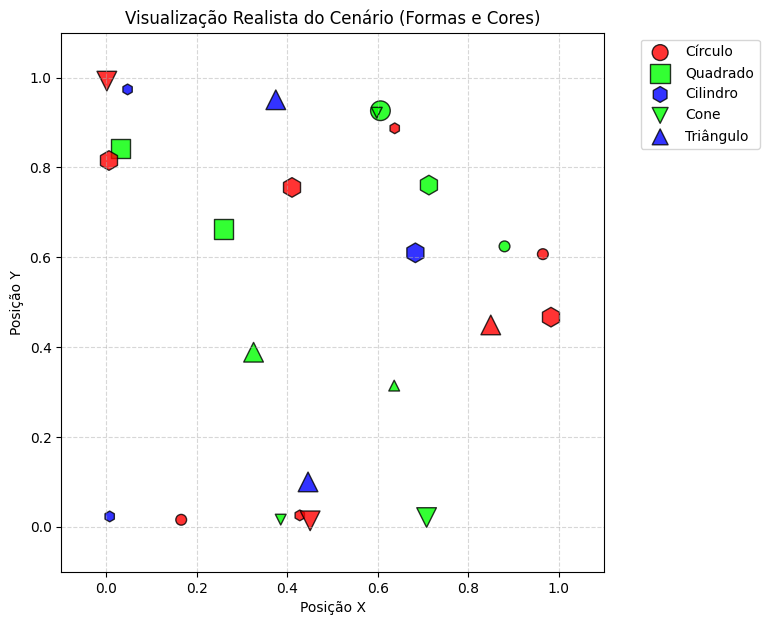


--> Satisfatibilidade:
Knowledge base satisfaction level: 0.9362

--> Executando Consultas de Raciocínio e suas SATISFABILIDADES...

=== SATISFATIBILIDADE (SatAgg) DAS PERGUNTAS ===

=== TAREFA 2: CONSULTAS DE RACIOCÍNIO HORIZONTAL ===
1. LastOnTheLeft: 'Existe objeto mais à Esquerda' (irreflexivo): 0.4028
2. LastOnTheRight: 'Existe objeto mais à Direita' (irreflexivo): 0.4141
3. Consulta Existencial: Esq de todos os Quadrados (exclui auto): 0.7609
4. A Restrição Quadrado-Círculo: Regra Quadrado à Dir de Círculo: 0.8942

=== TESTE UNITÁRIO: CLOSETO e INBETWEEN ===
Teste CloseTo (Perto 0.02): 0.9992 (Esperado: > 0.8)
Teste CloseTo (Longe 0.80): 0.2780 (Esperado: < 0.3)
Teste InBetween (B entre A e C): 0.9999 (Esperado: Alto)
Teste InBetween (A entre B e C): 0.0002 (Esperado: Baixo)

=== TAREFA 3: TESTE DE EMPILHAMENTO (canStack) ===
1. Verificação (Se base é Cilindro, Pode?): 0.9998
2. Verificação (Se base é Cone, Pode?): 0.0001
   (Nota: Valor baixo é CORRETO, pois a regra proíbe cone

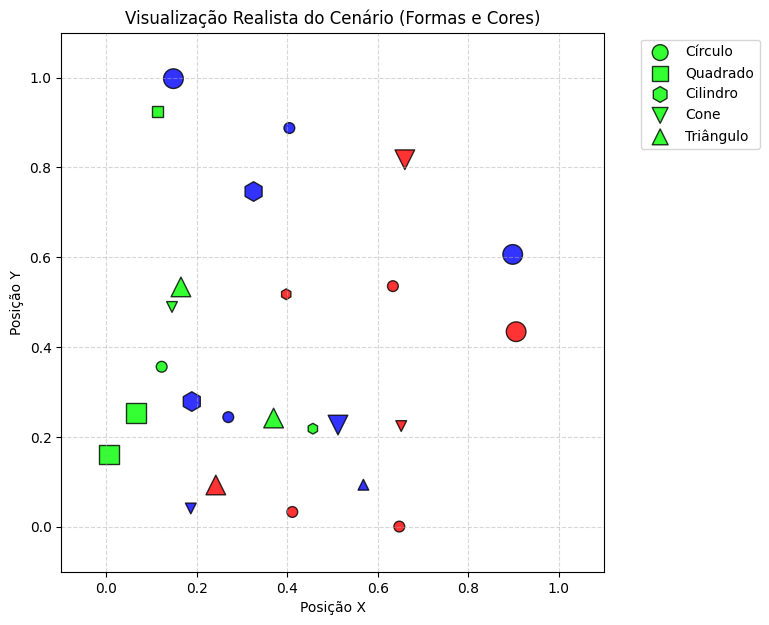


--> Satisfatibilidade:
Knowledge base satisfaction level: 0.9277

--> Executando Consultas de Raciocínio e suas SATISFABILIDADES...

=== SATISFATIBILIDADE (SatAgg) DAS PERGUNTAS ===

=== TAREFA 2: CONSULTAS DE RACIOCÍNIO HORIZONTAL ===
1. LastOnTheLeft: 'Existe objeto mais à Esquerda' (irreflexivo): 0.4175
2. LastOnTheRight: 'Existe objeto mais à Direita' (irreflexivo): 0.4041
3. Consulta Existencial: Esq de todos os Quadrados (exclui auto): 0.6787
4. A Restrição Quadrado-Círculo: Regra Quadrado à Dir de Círculo: 0.7922

=== TESTE UNITÁRIO: CLOSETO e INBETWEEN ===
Teste CloseTo (Perto 0.02): 0.9992 (Esperado: > 0.8)
Teste CloseTo (Longe 0.80): 0.2780 (Esperado: < 0.3)
Teste InBetween (B entre A e C): 0.9999 (Esperado: Alto)
Teste InBetween (A entre B e C): 0.0002 (Esperado: Baixo)

=== TAREFA 3: TESTE DE EMPILHAMENTO (canStack) ===
1. Verificação (Se base é Cilindro, Pode?): 0.9998
2. Verificação (Se base é Cone, Pode?): 0.0001
   (Nota: Valor baixo é CORRETO, pois a regra proíbe cone

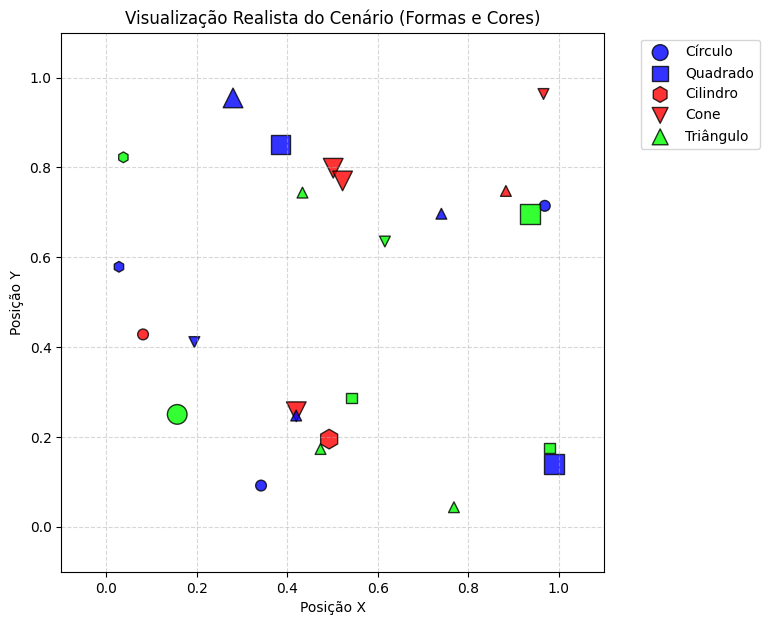


--> Satisfatibilidade:
Knowledge base satisfaction level: 0.9401

--> Executando Consultas de Raciocínio e suas SATISFABILIDADES...

=== SATISFATIBILIDADE (SatAgg) DAS PERGUNTAS ===

=== TAREFA 2: CONSULTAS DE RACIOCÍNIO HORIZONTAL ===
1. LastOnTheLeft: 'Existe objeto mais à Esquerda' (irreflexivo): 0.4131
2. LastOnTheRight: 'Existe objeto mais à Direita' (irreflexivo): 0.4056
3. Consulta Existencial: Esq de todos os Quadrados (exclui auto): 0.8268
4. A Restrição Quadrado-Círculo: Regra Quadrado à Dir de Círculo: 0.9199

=== TESTE UNITÁRIO: CLOSETO e INBETWEEN ===
Teste CloseTo (Perto 0.02): 0.9992 (Esperado: > 0.8)
Teste CloseTo (Longe 0.80): 0.2780 (Esperado: < 0.3)
Teste InBetween (B entre A e C): 0.9999 (Esperado: Alto)
Teste InBetween (A entre B e C): 0.0002 (Esperado: Baixo)

=== TAREFA 3: TESTE DE EMPILHAMENTO (canStack) ===
1. Verificação (Se base é Cilindro, Pode?): 0.9998
2. Verificação (Se base é Cone, Pode?): 0.0001
   (Nota: Valor baixo é CORRETO, pois a regra proíbe cone

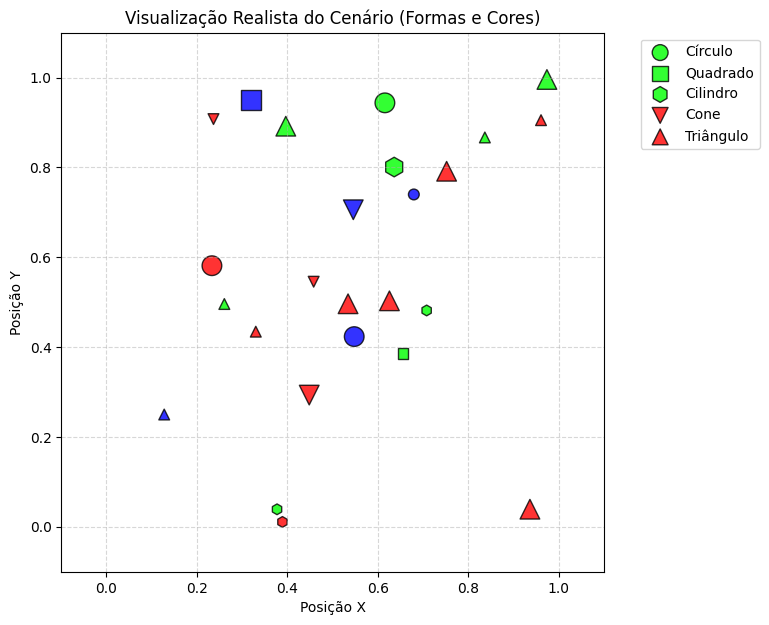


--> Satisfatibilidade:
Knowledge base satisfaction level: 0.9302

--> Executando Consultas de Raciocínio e suas SATISFABILIDADES...

=== SATISFATIBILIDADE (SatAgg) DAS PERGUNTAS ===

=== TAREFA 2: CONSULTAS DE RACIOCÍNIO HORIZONTAL ===
1. LastOnTheLeft: 'Existe objeto mais à Esquerda' (irreflexivo): 0.4190
2. LastOnTheRight: 'Existe objeto mais à Direita' (irreflexivo): 0.4037
3. Consulta Existencial: Esq de todos os Quadrados (exclui auto): 0.8196
4. A Restrição Quadrado-Círculo: Regra Quadrado à Dir de Círculo: 0.9202

=== TESTE UNITÁRIO: CLOSETO e INBETWEEN ===
Teste CloseTo (Perto 0.02): 0.9992 (Esperado: > 0.8)
Teste CloseTo (Longe 0.80): 0.2780 (Esperado: < 0.3)
Teste InBetween (B entre A e C): 0.9999 (Esperado: Alto)
Teste InBetween (A entre B e C): 0.0002 (Esperado: Baixo)

=== TAREFA 3: TESTE DE EMPILHAMENTO (canStack) ===
1. Verificação (Se base é Cilindro, Pode?): 0.9998
2. Verificação (Se base é Cone, Pode?): 0.0001
   (Nota: Valor baixo é CORRETO, pois a regra proíbe cone

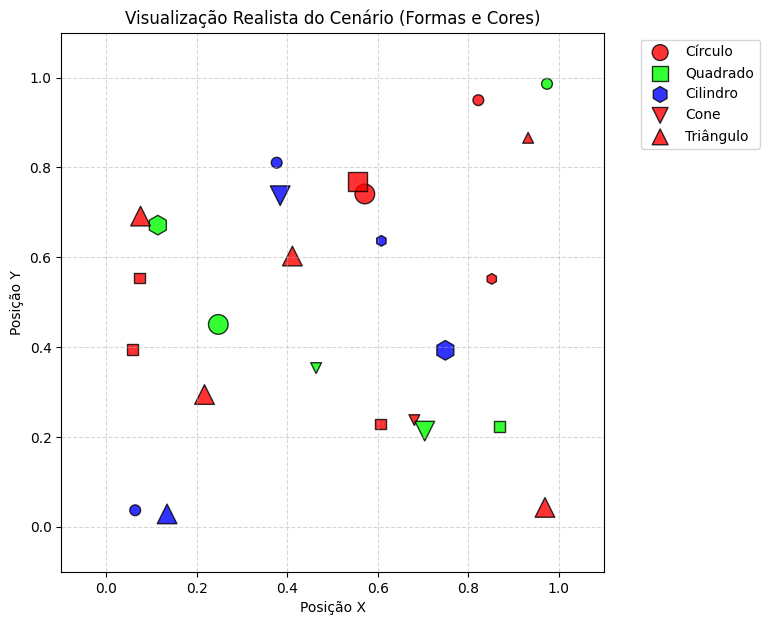


--> Satisfatibilidade:
Knowledge base satisfaction level: 0.9369

--> Executando Consultas de Raciocínio e suas SATISFABILIDADES...

=== SATISFATIBILIDADE (SatAgg) DAS PERGUNTAS ===

=== TAREFA 2: CONSULTAS DE RACIOCÍNIO HORIZONTAL ===
1. LastOnTheLeft: 'Existe objeto mais à Esquerda' (irreflexivo): 0.3932
2. LastOnTheRight: 'Existe objeto mais à Direita' (irreflexivo): 0.4173
3. Consulta Existencial: Esq de todos os Quadrados (exclui auto): 0.6714
4. A Restrição Quadrado-Círculo: Regra Quadrado à Dir de Círculo: 0.8306

=== TESTE UNITÁRIO: CLOSETO e INBETWEEN ===
Teste CloseTo (Perto 0.02): 0.9992 (Esperado: > 0.8)
Teste CloseTo (Longe 0.80): 0.2780 (Esperado: < 0.3)
Teste InBetween (B entre A e C): 0.9999 (Esperado: Alto)
Teste InBetween (A entre B e C): 0.0002 (Esperado: Baixo)

=== TAREFA 3: TESTE DE EMPILHAMENTO (canStack) ===
1. Verificação (Se base é Cilindro, Pode?): 0.9998
2. Verificação (Se base é Cone, Pode?): 0.0001
   (Nota: Valor baixo é CORRETO, pois a regra proíbe cone

In [ ]:
# EXPERIMENTO: REPETIÇÃO 5 VEZES

all_results = []

for run in range(1, 6):
    print(f"\n{'='*60}")
    print(f"EXECUÇÃO {run}")
    print(f"{'='*60}")

    # 1. Gerar NOVO dataset
    data, texts = get_clevr_data_expanded(25)
    objects = ltn.Variable("objects", data)

    # 2. Atualizar variáveis globais usadas no notebook
    globals()['data'] = data
    globals()['objects'] = objects

    # 3. Plotar o cenário DESTA execução
    print("\n--> Cenário gerado:")
    plot_scenario_with_shapes(data)   # <<<<< usa a função ORIGINAL do notebook

    # 4. Satisfatibilidade inicial
    print("\n--> Satisfatibilidade:")
    sat = check_satisfiability()

    # 5. Consultas (Queries)
    print("\n--> Executando Consultas de Raciocínio e suas SATISFABILIDADES...")
    print("\n=== SATISFATIBILIDADE (SatAgg) DAS PERGUNTAS ===")

    if 'query_knowledge_base' in globals():
        query_knowledge_base()
    else:
        print("Aviso: Função 'query_knowledge_base' não encontrada.")

    # Tenta rodar as consultas da Tarefa 3 (Compostas/Restrições)
    query_canStack()

    if 'queries_task_4' in globals():
        queries_task_4()
    else:
        print("Aviso: Função 'queries_task_4' não encontrada.")

    # 6. Métricas
    preds_dict = {
        'isRed': isRed, 'isGreen': isGreen, 'isBlue': isBlue,
        'isCircle': isCircle, 'isSquare': isSquare,
        'isCylinder': isCylinder, 'isCone': isCone,
        'isTriangle': isTriangle, 'isSmall': isSmall, 'isBig': isBig
    }

    metrics = evaluate_metrics(data, objects, preds_dict)
    evaluate_satisfiability(data, objects)

    # 7. Guardar resultados
    all_results.append({
        'run': run,
        'sat': sat.item(),
        'metrics': metrics
    })


In [ ]:
print("\n" + "="*70)
print("RESUMO FINAL DAS 5 EXECUÇÕES")
print("="*70)

for res in all_results:
    print(f"\nExecução {res['run']}")
    print(f"  Satisfatibilidade : {res['sat']:.4f}")

    accs = [v['acc'] for v in res['metrics'].values()]
    f1s  = [v['f1']  for v in res['metrics'].values()]

    print(f"  Acurácia média     : {sum(accs)/len(accs):.4f}")
    print(f"  F1-score médio     : {sum(f1s)/len(f1s):.4f}")


RESUMO FINAL DAS 5 EXECUÇÕES

Execução 1
  Satisfatibilidade : 0.9362
  Acurácia média     : 1.0000
  F1-score médio     : 1.0000

Execução 2
  Satisfatibilidade : 0.9277
  Acurácia média     : 1.0000
  F1-score médio     : 1.0000

Execução 3
  Satisfatibilidade : 0.9401
  Acurácia média     : 1.0000
  F1-score médio     : 1.0000

Execução 4
  Satisfatibilidade : 0.9302
  Acurácia média     : 1.0000
  F1-score médio     : 1.0000

Execução 5
  Satisfatibilidade : 0.9369
  Acurácia média     : 1.0000
  F1-score médio     : 1.0000


## **5. Ponto Extra - Explicando o Raciocínio dos Resultados**

### **a) Satisfatibilidade**

Após o treino no dataset inializado manualmente e os cinco testes feitos em variações aleatórias deste dataset, **observa-se um comportamento consistente da base de conhecimento**. Em todas as avaliações, a satisfatibilidade manteve-se em níveis elevados, variando entre aproximadamente **92% e 94%**, o que indica que as restrições lógicas aprendidas não ficaram restritas aos dados de treino originais. Esse resultado sugere que o modelo conseguiu internalizar as regularidades impostas pelos axiomas, generalizando corretamente para configurações não vistas durante o treinamento. As pequenas variações entre os valores de satisfatibilidade podem ser atribuídas à natureza fuzzy da LTN e às diferenças estatísticas introduzidas pela geração aleatória dos datasets, sem comprometer a consistência global da base de conhecimento.

### **b) Raciocínio espacial horizontal**

Nas consultas de raciocínio horizontal, as perguntas que verificam a existência de um objeto absolutamente mais à esquerda ou mais à direita do cenário **apresentam valores intermediários, geralmente entre 39% e 42%**. Diferentemente de cenários altamente restritivos, esses valores indicam que, em muitos casos, **há objetos que satisfazem parcialmente essas relações, mas dificilmente de forma absoluta**. A lógica fuzzy permite capturar esse grau intermediário de satisfação, refletindo a distribuição contínua das posições dos objetos.

A consulta que avalia a existência de um objeto à esquerda de todos os quadrados apresenta valores mais elevados, **variando aproximadamente entre 67% e 83%**. Esse comportamento **é coerente com o fato de que a condição é menos restritiva**, pois o quantificador universal é aplicado apenas ao subconjunto dos quadrados. **Dependendo da quantidade e da posição desses objetos no cenário**, torna-se bastante plausível que algum objeto satisfaça essa relação espacial.

O teste para o predicado inBetween foi feito usando dados manuais com o fim de mostrar a eficácia da implementação. O teste obteve o resultado de **99,9%** quando um objeto estava **entre** os outros dois objetos e de aproximadamente **0%** quando o objeto **não** estava entre os outros objetos.

### **c) Raciocínio Vertical e Regras de Empilhamento**

No raciocínio vertical e nas regras de empilhamento, os resultados mostram um **comportamento altamente coerente com as restrições definidas**. As consultas que verificam a possibilidade de empilhamento quando a **base é um cilindro** apresentam valores próximos de 100% em todas as execuções, **indicando que essa regra foi plenamente aprendida pelo modelo**. Em contraste, as consultas que avaliam o **empilhamento sobre cones** apresentam valores próximos de zero, o que é esperado, **já que a regra proíbe explicitamente esse tipo de configuração**. A consulta existencial que verifica a presença de ao menos um par empilhável válido apresenta valores intermediários, em torno de 53% a 68%, indicando que, na maioria dos cenários, **existe pelo menos uma configuração compatível**, embora não seja garantido que existam muitas.

### **d) Raciocínio Composto**

Nas consultas de raciocínio composto, que combinam múltiplos atributos e relações espaciais, **os valores de satisfatibilidade tendem a ser baixos**. A consulta que busca um objeto pequeno, abaixo de um cilindro e à esquerda de um quadrado apresenta valores geralmente abaixo de 7%, **refletindo o caráter altamente restritivo da combinação dessas condições**. A consulta que avalia a existência de um cone verde entre dois objetos também apresenta valores baixos ou moderados, variando aproximadamente entre 0% e 19%, **o que é coerente com a baixa probabilidade de satisfação simultânea de forma, cor e relação espacial em cenários aleatórios**.

Em contraste, a regra que impõe que triângulos próximos devem ter o mesmo tamanho apresenta valores consistentemente elevados, variando aproximadamente entre 80% e 96%. Como essa regra é incorporada diretamente ao processo de treinamento, o modelo é continuamente penalizado quando a viola, o que leva à **aprendizagem eficaz dessa restrição e resulta em altos níveis de satisfatibilidade**.

### **e) Métricas de Desempenho**

Por fim, as métricas associadas aos predicados básicos de forma, cor e tamanho apresentam **acurácia, precisão, recall e F1-score iguais a 100% em todas as execuções**. Esse resultado ocorre porque **esses predicados estão diretamente alinhados com a forma como os dados são gerados e são fortemente guiados por regras de exclusividade e completude**.

De forma geral, os resultados mostram que o sistema neuro-simbólico **se comporta de maneira consistente e coerente**, apresentando altos valores para regras bem aprendidas e valores mais baixos para consultas altamente restritivas, **refletindo corretamente a semântica fuzzy adotada pelo modelo**.